In [3]:
using Base: load_InteractiveUtils
using Plots

include("demoEstimationGaussian.jl")

demoEstimationGaussian (generic function with 9 methods)

In [16]:
####### rho = 50 
# with sigma = 0.1 lambda = 0.1 PAPER
#D = load("results/results50/result_s=1_n=1000_p=1000_sigma=100_lambda=100_tol=10.jld");sigma = 0.1
# In the jld file name lambda and sigma have to be divided by 1000

####### rho = 50 
# with sigma = 0.1 lambda = 0.1 PAPER
#D = load("results/results50/result_s=1_n=1000_p=1000_sigma=100_lambda=100_tol=10.jld");sigma = 0.1
# In the jld file name lambda and sigma have to be divided by 1000


####### rho = 100 
# with sigma = 0.1 and lambda = 0.1 
#D = load("results/results100/results/result_s=1_n=1000_p=1000_sigma=100_lambda=100_tol=10.jld");sigma = 0.1;

# with sigma = 0.1 and lambda = 0.01 PAPER
#D = load("results/results100/results/result_s=1_n=1000_p=1000_sigma=100_lambda=10_tol=10.jld");sigma = 0.1;

#############  SM  ##########################

# 3 DPP samples
#D = load("results/results100LambdaSmall/results/result_s=3_n=1000_p=1000_sigma=100_lambda=100divideBy1Million_tol=10.jld"); sigma = 0.1;
# lambda = 1e-4

# 10 DPP samples
D = load("results/results100LambdaSmall/results/result_s=10_n=1000_p=1000_sigma=100_lambda=100divideBy1Million_tol=10.jld");sigma = 0.1;
# lambda = 1e-4;

##

# 10 DPP samples
#D = load("results/results100LambdaSmall/results/result_s=10_n=1000_p=1000_sigma=150_lambda=100divideBy1Million_tol=10.jld");sigma = 0.15;
# lambda = 1e-4


0.1

In [17]:
B = D["B"];
R = D["R"];
GramA = D["GramA"];
GramA0 = D["GramA0"];
GramK = D["GramK"];
GramK0 = D["GramK0"];
n = D["n"]
totalSamples = D["totalSamples"];
i_stop = D["i_stop"];
obj = D["obj"];

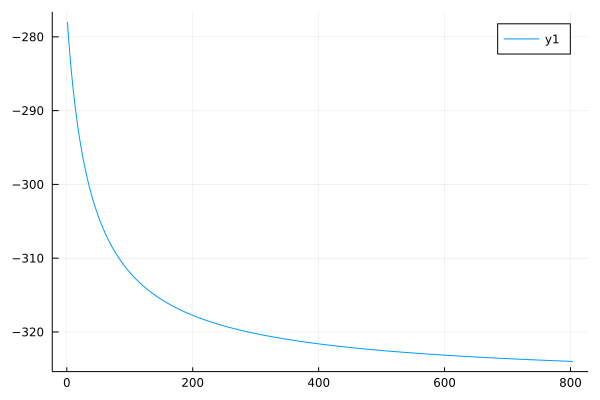

In [18]:
plot(obj[30:i_stop])

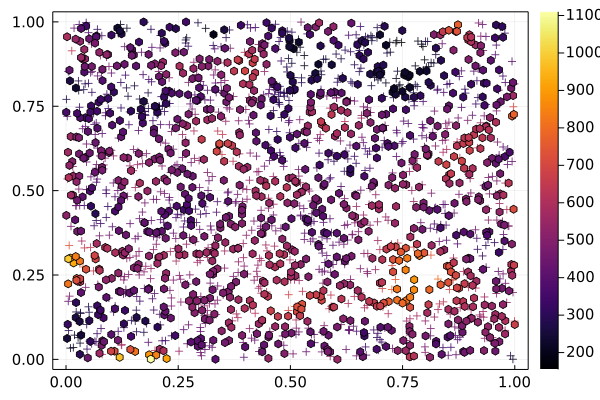

In [19]:
## scatter plot
diagL = diag(R'*B*R);
scatter(totalSamples[:,1],totalSamples[:,2],zcolor=diagL,marker = :+)
scatter!(totalSamples[(n+1):end,1],totalSamples[(n+1):end,2],zcolor=diagL[(n+1):end],marker = :hexagon,legend = false,colorbar = true,framestyle=:box,xtickfont = font(10),ytickfont = font(10))

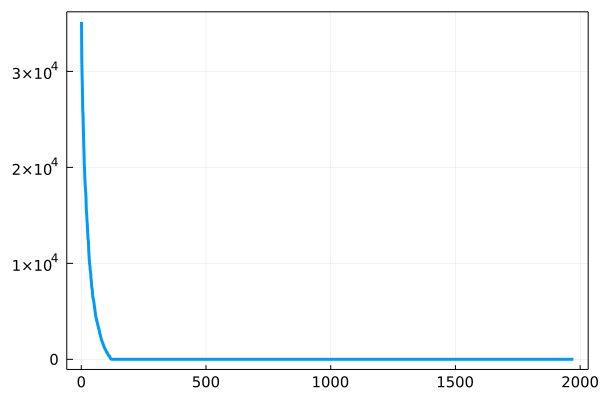

In [20]:
# decay eigenvalues
l = sort(real(eigvals(R'*B*R)), rev=true)
plot(l,legend = false,framestyle=:box,xtickfont = font(10),ytickfont = font(10),linewidth = 3)

In [23]:
# heatmap estimated correlation kernel 
c_1 = 0.; c_2 = 1.;d = 2;p = 15000;

n_test = 100*100; a = 0.2; b = .8; print("Smaller grid")
testSamplesDense = constructFlatSquareGrid(n_test, a, b);

unifSamples = rand(Uniform(c_1,c_2), p,d);
k = SqExponentialKernel();

GramKDense = correlationKernelGram(B,R,unifSamples,totalSamples,testSamplesDense,k,sigma);
IntensityGramK = reshape(diag(GramKDense),(100,100));

x_tics = a:(1/99):b;
y_tics = x_tics;
display(heatmap(x_tics,y_tics,IntensityGramK,colorbar = true,xtickfont = font(10),ytickfont = font(10)))

Smaller gridcond number of estimateK 20.162909567816826


In [24]:
# heatmap exact correlation kernel 

alpha0 = 0.05;
rho0 = 100;
xtest0 = (testSamplesDense)'/(alpha0/sqrt(2));
k0 = SqExponentialKernel();

GramKDense0 = rho0*kernelmatrix(k0, xtest0) + 1e-10 *I ; # positive definite

display(heatmap(x_tics,y_tics,GramKDense0,colorbar = true,xtickfont = font(10),ytickfont = font(10)))

plot(diag(GramKDense),xtickfont = font(10),ytickfont = font(10),legend=false);
plot!(100*ones(size(diag(GramKDense))),xtickfont = font(10),ytickfont = font(10),legend=false,linewidth=3)